## Polinomios de Lagrange para 3 puntos
Los polinomios de Lagrange viene definido por la formula
\begin{equation}
L_{j}(x) = ∏_{i = 0, i \neq j}^{n-1}\frac{x-x_{i}}{x_{j}-x_{i}}
\end{equation}
Luego el polinomio sería:
\begin{equation}
P(x) = \sum_{k = 0}^{n} f(x_{k})L_{k}(x)
\end{equation}
En nuestro caso tenemos los puntos $H = \left\{ (x,y)\in ℝ \times ℝ: (2,4),(5,1),(6,2)   \right\}$
Siendo cada polinomio:
\begin{equation}
 L_{0}(x) = (\frac{x - x_{1}}{x_{0} - x_{1}})(\frac{x-x_{2}}{x_{0} - x_{2}})
\end{equation}
\begin{equation}
 L_{1}(x) = (\frac{x - x_{0}}{x_{1} - x_{0}})(\frac{x-x_{2}}{x_{1} - x_{2}})
\end{equation}
\begin{equation}
 L_{2}(x) = (\frac{x - x_{0}}{x_{2} - x_{0}})(\frac{x-x_{1}}{x_{2} - x_{1}})
\end{equation}
Así el polinomio total sería:
\begin{equation}
P(x) = f(x_{0})L_{0} + f(x_{1})L_{1} + f(x_{2})L_{2}
\end{equation}

\begin{equation}
P(x) = f(x_{0})(\frac{x - x_{1}}{x_{0} - x_{1}})(\frac{x-x_{2}}{x_{0} - x_{2}}) + f(x_{1})(\frac{x - x_{0}}{x_{1} - x_{0}})(\frac{x-x_{2}}{x_{1} - x_{2}}) + f(x_{2})(\frac{x - x_{0}}{x_{2} - x_{0}})(\frac{x-x_{1}}{x_{2} - x_{1}})
\end{equation}

Reemplazando valores sería:

\begin{equation}
 P(x) = 4(\frac{x - 5}{2 - 5})(\frac{x-6}{2 - 6} + (6-x)(\frac{x-2}{3})+2(\frac{x-2}{4})(x-5)
\end{equation}

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
x = sp.Symbol("x")
puntosx = (2,5,6)
puntosy = (4,1,2)
L_i = list()
for j in range(len(puntosx)):
  f = 1
  for i in range(len(puntosx)):
    if i != j:
      f = f * ( (x-puntosx[i])/(puntosx[j] - puntosx[i]))
  L_i.append(f)
L_i
p = 0
for i in range(len(L_i)):
  p = p + puntosy[i]*L_i[i]
p

4*(3/2 - x/4)*(5/3 - x/3) + (6 - x)*(x/3 - 2/3) + 2*(x/4 - 1/2)*(x - 5)

In [ ]:
def Lagrange(j,x_):
  """
  Paramas : Polinomio de lagrange j-esimo
  n : Número de puntos.
  x_ : puntos a interpolar
  """
  L0 = 1
  for i in range(0,len(x_)):
     if i != j:
      L0*= ( x - x_[i]) / (x_[j] - x_[i])
  return L0

def P(x,x_,y_):
  poly = 0
  for i in range(0,len(y_)):
    poly += y_[i]*Lagrange(i,x_)
  return poly

In [ ]:
x_ = np.array([2,5,6])
y_ = np.array([4,1,2])

sp.simplify(P(x,x_,y_))

x**2/2 - 9*x/2 + 11

In [ ]:
def polinomio_lagrange(datosx,datosy):
  x = sp.Symbol("x")
  L = list()
  for j in range(len(datosx)):
    f = 1
    for i in range(len(datosx)):
      if i != j:
        f = f * ( (x-datosx[i])/(datosx[j] - datosx[i]))
    L.append(f)
  p = 0
  for i in range(len(L)):
    p = p + datosy[i]*L[i]
  return sp.simplify(p)

sp.simplify(polinomio_lagrange(puntosx,puntosy))

fx = sp.lambdify(x,sp.simplify(polinomio_lagrange(puntosx,puntosy)),"numpy")


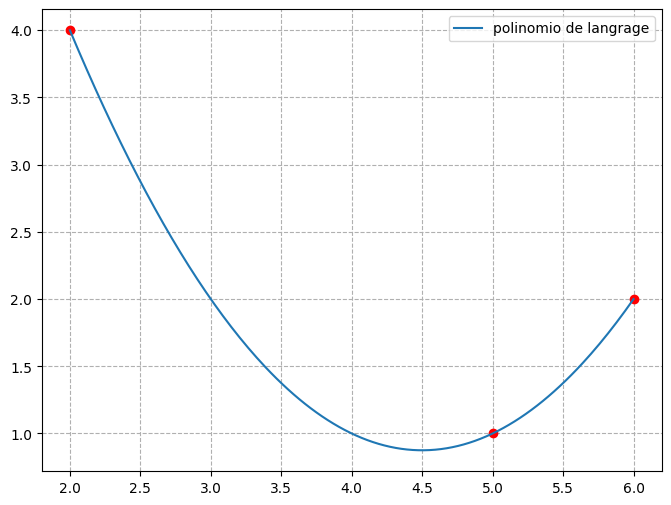

In [ ]:
x1 = np.linspace(min(puntosx),max(puntosx),200)
plt.figure(figsize = (8,6))
plt.plot(puntosx,puntosy,"ro")
plt.plot(x1,fx(x1),label = "polinomio de langrage")
plt.grid(True,linestyle ="dashed")
plt.legend()

A esta función se realizará una interpolación de lagrange.
Para el intervalo [-1,1]. Donde, los puntos aumentan de n = 4,8,12,16,20.

\begin{equation}
f(x) = \frac{1}{1+25x^{2}}
\end{equation}


<Figure size 640x480 with 0 Axes>

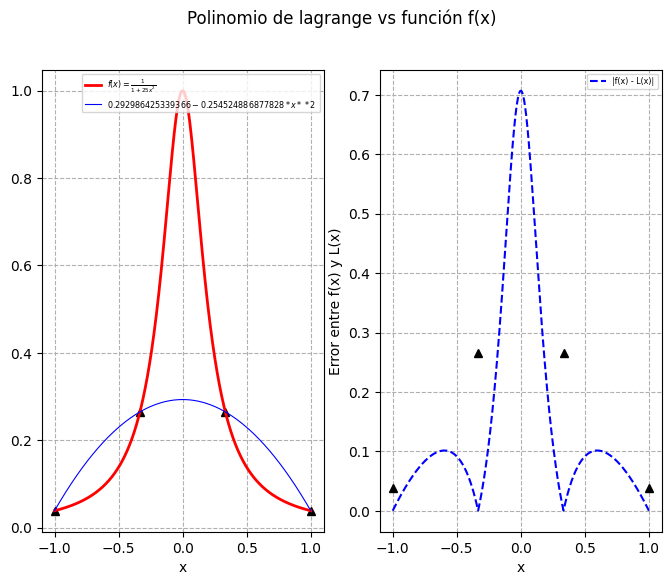

In [ ]:
f = lambda x : 1 / ( 1 + 25 * x ** 2 )
### caso para 4 puntos.
dom = np.linspace(-1,1,2000)
x1 = np.linspace(-1,1,4)
y1 = f(x1)
poly = polinomio_lagrange(x1,y1)
funct_poly = sp.lambdify(x,poly,"numpy")
### Error para todos los puntos.

error = np.zeros(len(dom))
for i in range(len(error)):
  error[i] = abs ( f(dom[i]) - funct_poly(dom[i]))

### Grafica de estos valores, en aquel intervalo y para el error.
plt.figure()
fig,ax = plt.subplots(1,2, figsize = (8,6))
ax[0].plot(x1,y1,"^",color = "black", linewidth = 2)
ax[0].plot(dom,f(dom),color = "red", linewidth = 2,label = r"$f(x) = \frac{1}{1+25x^{2}}$")
ax[0].plot(dom,funct_poly(dom),color = "blue",linewidth = 0.8, label = fr"${poly}$")
ax[0].grid(True,ls = "dashed")
ax[0].legend(loc = "upper right",fontsize = "xx-small")
ax[0].set_xlabel("x")
fig.suptitle("Polinomio de lagrange vs función f(x)")
ax[1].plot(x1,y1,"^",color = "black", linewidth = 2)
ax[1].grid(True, ls = "dashed")
ax[1].plot(dom,error, color = "blue",ls = "--", label = "|f(x) - L(x)|")
ax[1].legend(loc = "upper right",fontsize = "xx-small")
ax[1].set_xlabel("x")
ax[1].set_ylabel("Error entre f(x) y L(x)")
plt.show()


<Figure size 640x480 with 0 Axes>

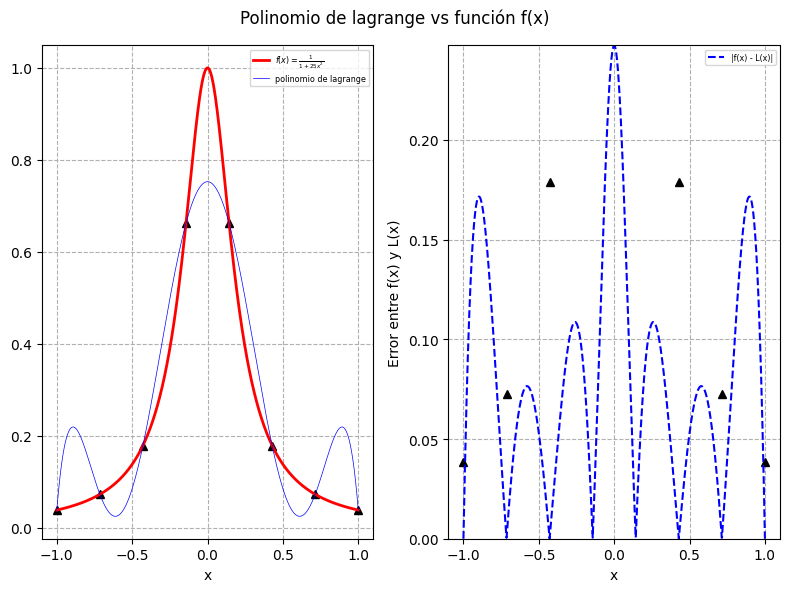

-1.77635683940025e-14*x**7 - 5.17359870277277*x**6 + 3.5527136788005e-14*x**5 + 9.07597029572138*x**4 - 1.4210854715202e-14*x**3 - 4.61655144792775*x**2 - 1.04083408558608e-16*x + 0.752641393440685

In [ ]:

### caso para 8 puntos.
x2 = np.linspace(-1,1,8)
y2 = f(x2)
poly2 = polinomio_lagrange(x2,y2)
funct_poly2 = sp.lambdify(x,poly2,"numpy")

### Error para todos los puntos.

error1 = np.zeros(len(dom))
for i in range(len(error1)):
  error1[i] = abs ( f(dom[i]) - funct_poly2(dom[i]))

### Grafica de estos valores, en aquel intervalo y para el error.
plt.figure()
fig,ax = plt.subplots(1,2, figsize = (8,6))
ax[0].plot(x2,y2,"^",color = "black", linewidth = 2)
ax[0].plot(dom,f(dom),color = "red", linewidth = 2,label = r"$f(x) = \frac{1}{1+25x^{2}}$")
ax[0].plot(dom,funct_poly2(dom),color = "blue",linewidth = 0.5, label = fr"polinomio de lagrange")
ax[0].grid(True,ls = "dashed")
ax[0].legend(loc = "upper right",fontsize = "xx-small")
ax[0].set_xlabel("x")
fig.suptitle("Polinomio de lagrange vs función f(x)")
ax[1].plot(x2,y2,"^",color = "black", linewidth = 2)
ax[1].grid(True, ls = "dashed")
ax[1].plot(dom,error1, color = "blue",ls = "--", label = "|f(x) - L(x)|")
ax[1].legend(loc = "upper right",fontsize = "xx-small")
ax[1].set_ylim(min(error1),max(error1))
ax[1].set_xlabel("x")
ax[1].set_ylabel("Error entre f(x) y L(x)")
plt.tight_layout()
plt.show()

poly2

<Figure size 640x480 with 0 Axes>

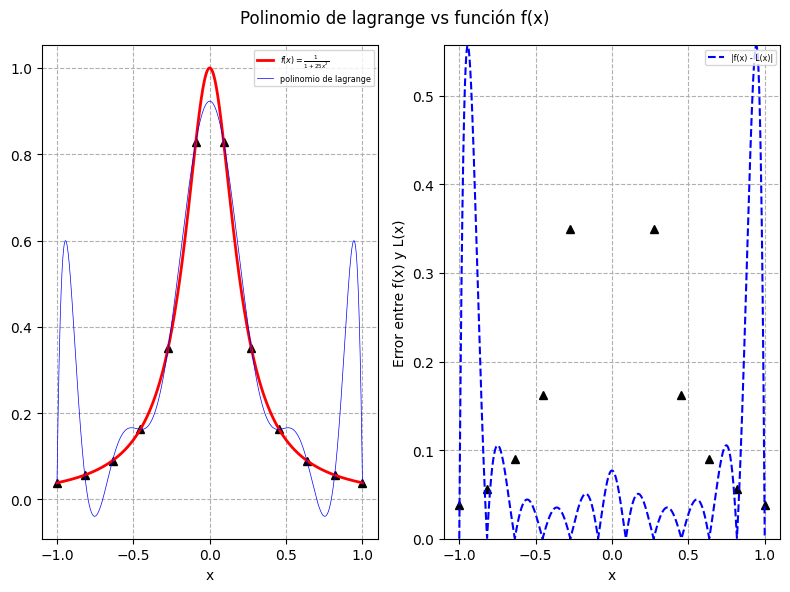

2.24344987032055e-11*x**15 - 1518.86438621443*x**14 - 2.05950811960065e-11*x**13 + 4651.10027600785*x**12 - 1.23957732967028e-10*x**11 - 5570.00947938514*x**10 + 1.37660549626162e-10*x**9 + 3347.68104837781*x**8 + 2.09389172667329e-11*x**7 - 1083.00942611947*x**6 - 9.69768709779828e-12*x**5 + 190.143756288067*x**4 - 1.49406962496323e-13*x**3 - 17.9795744925626*x**2 + 1.01289809195269e-15*x + 0.976247076344098

In [ ]:

### caso para 12 puntos.
x3 = np.linspace(-1,1,12)
y3 = f(x3)
poly3 = polinomio_lagrange(x3,y3)
funct_poly3 = sp.lambdify(x,poly3,"numpy")

### Error para todos los puntos.

error2 = np.zeros(len(dom))
for i in range(len(error2)):
  error2[i] = abs ( f(dom[i]) - funct_poly3(dom[i]))

### Grafica de estos valores, en aquel intervalo y para el error.
plt.figure()
fig,ax = plt.subplots(1,2, figsize = (8,6))
ax[0].plot(x3,y3,"^",color = "black", linewidth = 2)
ax[0].plot(dom,f(dom),color = "red", linewidth = 2,label = r"$f(x) = \frac{1}{1+25x^{2}}$")
ax[0].plot(dom,funct_poly3(dom),color = "blue",linewidth = 0.5, label = fr"polinomio de lagrange")
ax[0].grid(True,ls = "dashed")
ax[0].legend(loc = "upper right",fontsize = "xx-small")
ax[0].set_xlabel("x")
fig.suptitle("Polinomio de lagrange vs función f(x)")
ax[1].plot(x3,y3,"^",color = "black", linewidth = 2)
ax[1].grid(True, ls = "dashed")
ax[1].plot(dom,error2, color = "blue",ls = "--", label = "|f(x) - L(x)|")
ax[1].legend(loc = "upper right",fontsize = "xx-small")
ax[1].set_ylim(min(error2),max(error2))
ax[1].set_xlabel("x")
ax[1].set_ylabel("Error entre f(x) y L(x)")
plt.tight_layout()
plt.show()

poly3

<Figure size 640x480 with 0 Axes>

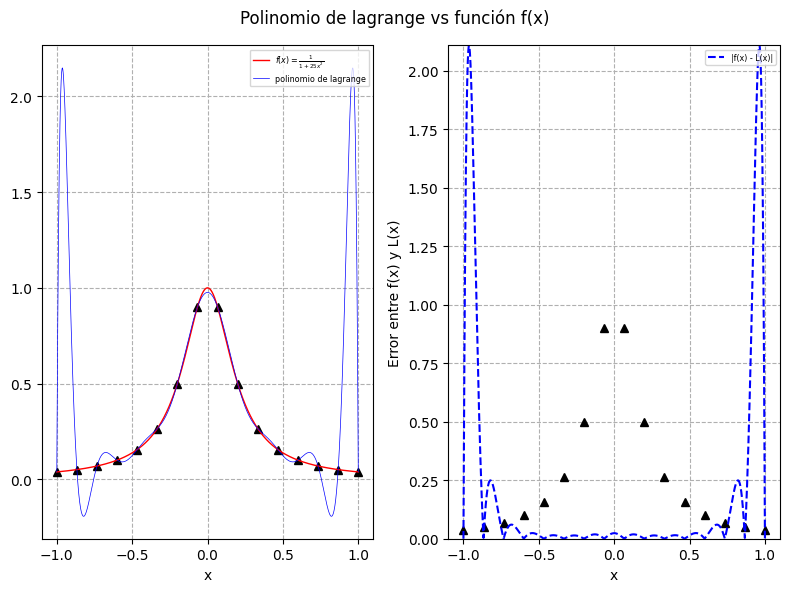

2.24344987032055e-11*x**15 - 1518.86438621443*x**14 - 2.05950811960065e-11*x**13 + 4651.10027600785*x**12 - 1.23957732967028e-10*x**11 - 5570.00947938514*x**10 + 1.37660549626162e-10*x**9 + 3347.68104837781*x**8 + 2.09389172667329e-11*x**7 - 1083.00942611947*x**6 - 9.69768709779828e-12*x**5 + 190.143756288067*x**4 - 1.49406962496323e-13*x**3 - 17.9795744925626*x**2 + 1.01289809195269e-15*x + 0.976247076344098

In [ ]:

### caso para 16 puntos.
x4 = np.linspace(-1,1,16)
y4 = f(x4)
poly4 = polinomio_lagrange(x4,y4)
funct_poly4 = sp.lambdify(x,poly4,"numpy")

### Error para todos los puntos.

error3 = np.zeros(len(dom))
for i in range(len(error3)):
  error3[i] = abs ( f(dom[i]) - funct_poly4(dom[i]))

### Grafica de estos valores, en aquel intervalo y para el error.
plt.figure()
fig,ax = plt.subplots(1,2, figsize = (8,6))
ax[0].plot(x4,y4,"^",color = "black", linewidth = 2)
ax[0].plot(dom,f(dom),color = "red", linewidth = 1,label = r"$f(x) = \frac{1}{1+25x^{2}}$")
ax[0].plot(dom,funct_poly4(dom),color = "blue",linewidth = 0.5, label = fr"polinomio de lagrange")
ax[0].grid(True,ls = "dashed")
ax[0].legend(loc = "upper right",fontsize = "xx-small")
ax[0].set_xlabel("x")
fig.suptitle("Polinomio de lagrange vs función f(x)")
ax[1].plot(x4,y4,"^",color = "black", linewidth = 2)
ax[1].grid(True, ls = "dashed")
ax[1].plot(dom,error3, color = "blue",ls = "--", label = "|f(x) - L(x)|")
ax[1].legend(loc = "upper right",fontsize = "xx-small")
ax[1].set_ylim(min(error3),max(error3))
ax[1].set_xlabel("x")
ax[1].set_ylabel("Error entre f(x) y L(x)")
plt.tight_layout()
plt.show()

poly4

<Figure size 640x480 with 0 Axes>

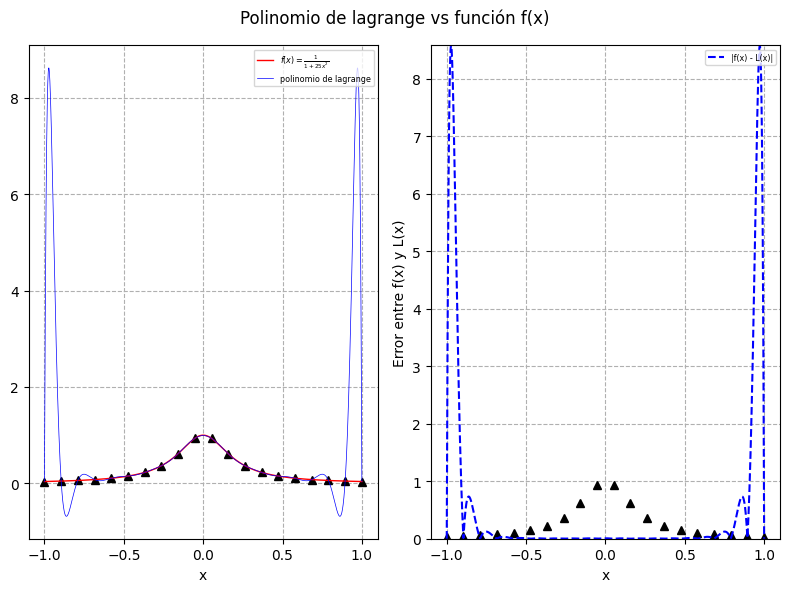

-2.0415846790911e-9*x**19 - 25671.1624063652*x**18 + 8.49152570481237e-9*x**17 + 95604.8132565554*x**16 + 3.23401678770097e-8*x**15 - 146791.495746579*x**14 + 1.24050103522677e-9*x**13 + 121018.600641386*x**12 - 1.88201312312231e-8*x**11 - 58584.9758342144*x**10 - 6.62221966152288e-9*x**9 + 17172.4877660124*x**8 + 1.01426145260319e-10*x**7 - 3055.32481316013*x**6 + 3.00380744583384e-11*x**5 + 327.726424123745*x**4 - 5.5440707905606e-13*x**3 - 21.6235074869496*x**2 + 5.01251725927376e-15*x + 0.992681252255393

In [ ]:

### caso para 20 puntos.
x5 = np.linspace(-1,1,20)
y5 = f(x5)
poly5 = polinomio_lagrange(x5,y5)
funct_poly5 = sp.lambdify(x,poly5,"numpy")

### Error para todos los puntos.

error4 = np.zeros(len(dom))
for i in range(len(error4)):
  error4[i] = abs ( f(dom[i]) - funct_poly5(dom[i]))

### Grafica de estos valores, en aquel intervalo y para el error.
plt.figure()
fig,ax = plt.subplots(1,2, figsize = (8,6))
ax[0].plot(x5,y5,"^",color = "black", linewidth = 2)
ax[0].plot(dom,f(dom),color = "red", linewidth = 1,label = r"$f(x) = \frac{1}{1+25x^{2}}$")
ax[0].plot(dom,funct_poly5(dom),color = "blue",linewidth = 0.5, label = fr"polinomio de lagrange")
ax[0].grid(True,ls = "dashed")
ax[0].legend(loc = "upper right",fontsize = "xx-small")
ax[0].set_xlabel("x")
fig.suptitle("Polinomio de lagrange vs función f(x)")
ax[1].plot(x5,y5,"^",color = "black", linewidth = 2)
ax[1].grid(True, ls = "dashed")
ax[1].plot(dom,error4, color = "blue",ls = "--", label = "|f(x) - L(x)|")
ax[1].legend(loc = "upper right",fontsize = "xx-small")
ax[1].set_ylim(min(error4),max(error4))
ax[1].set_xlabel("x")
ax[1].set_ylabel("Error entre f(x) y L(x)")
plt.tight_layout()
plt.show()

poly5